## Assignment

Nama    : Shafa Diva Syahira
NIM     : 1301200157

Import necessary library

In [80]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [81]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [82]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [83]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [84]:
df_can['Total'] = df_can.sum(axis=1)

C:\Users\shafa\AppData\Local\Temp\ipykernel_13152\552165185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [85]:
#Mengubah Index menjadi nama negara
df_can.set_index('Country', inplace=True)
#Mencari index dengan string "Japan" dan ""
df_can.loc[['Japan','India']]


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

In [86]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [90]:
df_can.index.name = None
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))

japan = df_can.loc['Japan', years] 
india = df_can.loc['India',years]

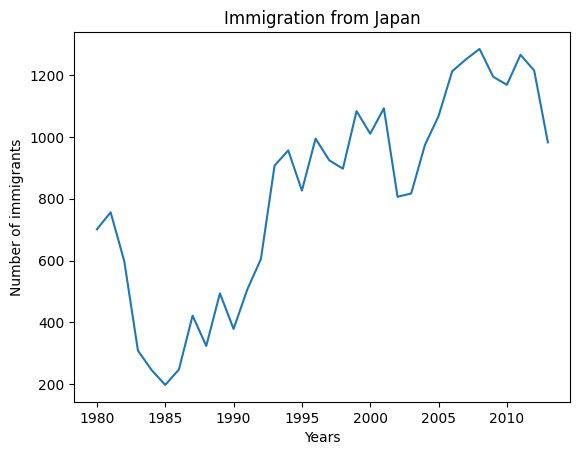

In [91]:
### type your answer here
japan.index = japan.index.map(int)
japan.plot(kind='line')

plt.title('Immigration from Japan')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

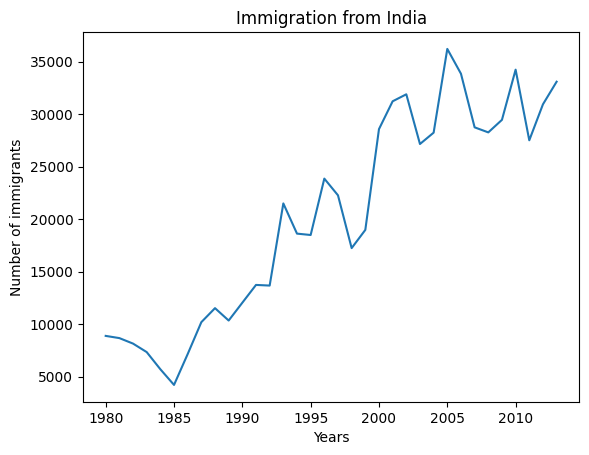

In [92]:
india.index = india.index.map(int)
india.plot(kind='line')

plt.title('Immigration from India')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

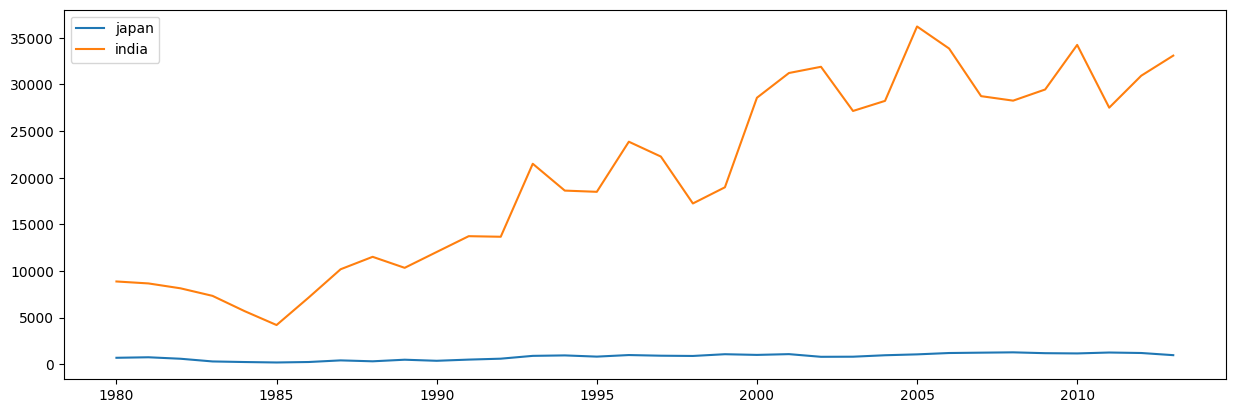

In [93]:
plt.figure().set_figwidth(15)
plt.plot(japan, label='japan')
plt.plot(india, label='india')

plt.legend()
plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [98]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose() 
df_top5.head()


,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Step 2: Plot graph

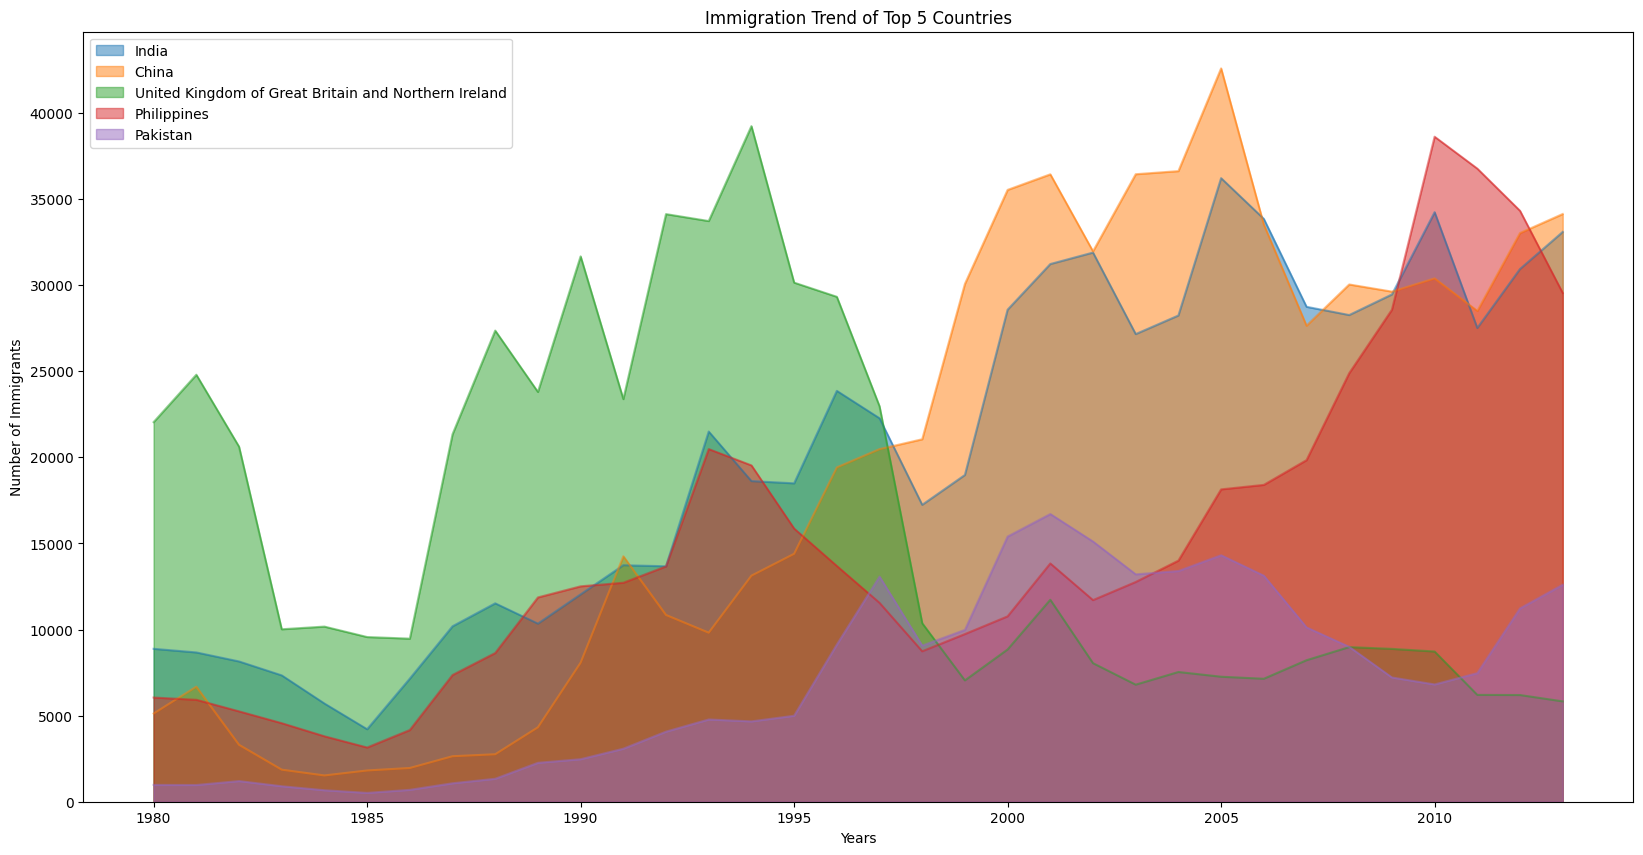

In [99]:
### type your answer here
df_top5.index = df_top5.index.map(int) 
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), 
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

Text(0.5, 0, 'Years')

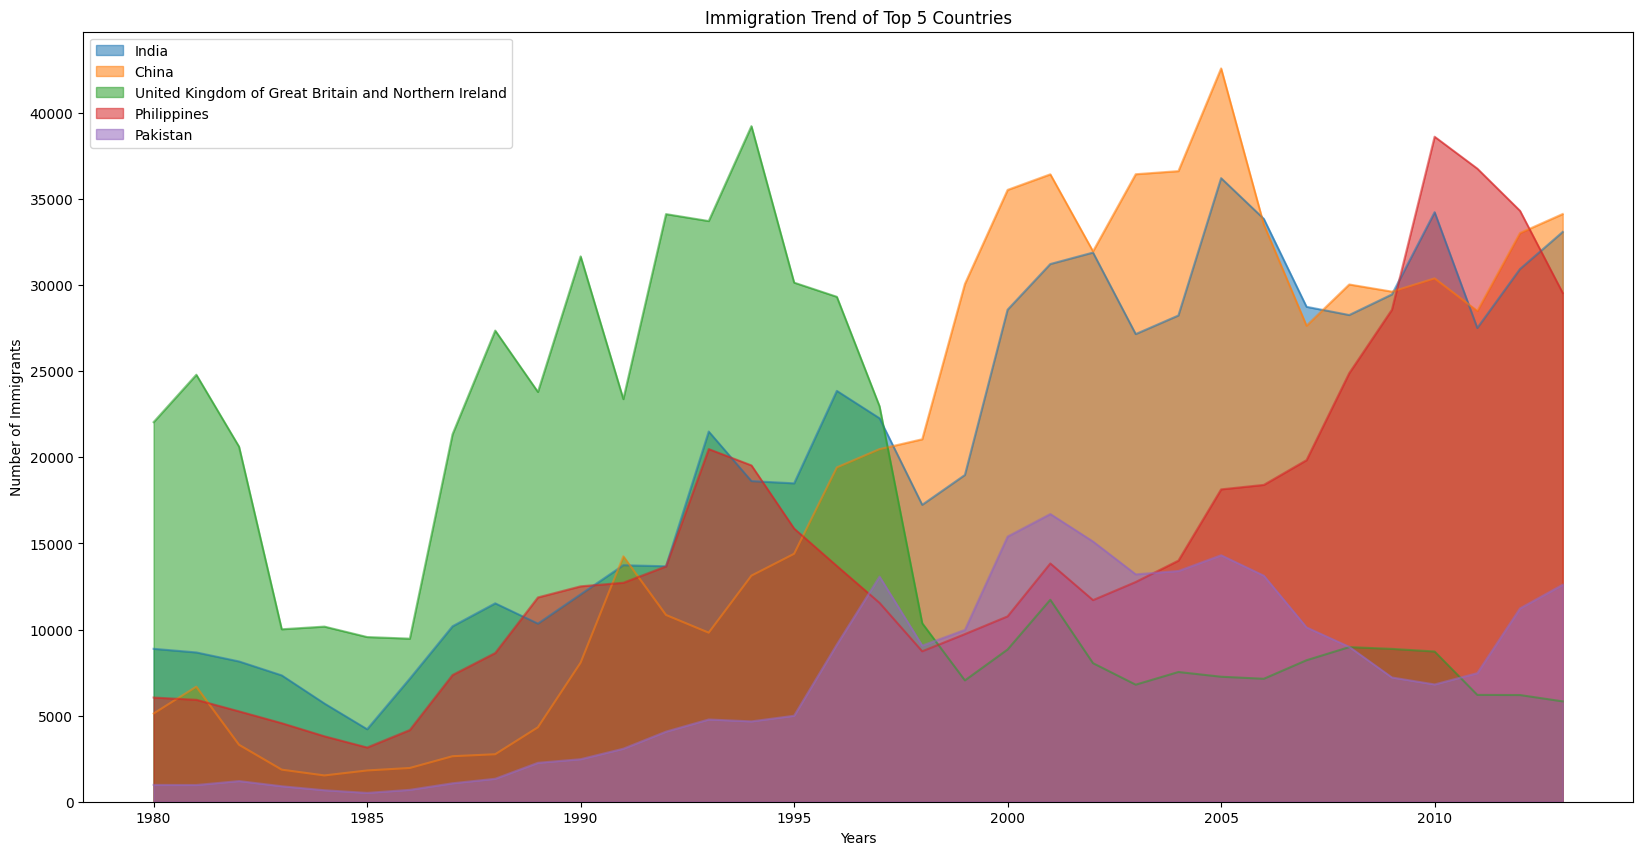

In [100]:
df_top5.plot(kind='area', 
             alpha=0.55,
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

Text(0.5, 0, 'Number of Immigrants')

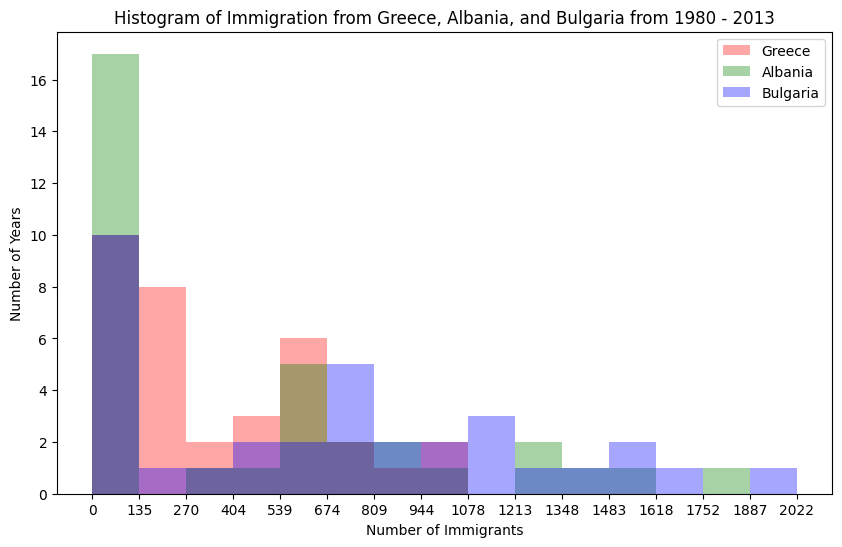

In [111]:
### type your answer here
GAB = df_can.loc[['Greece','Albania','Bulgaria']]
GAB = GAB[years].transpose() 

count, bin_edges = np.histogram(GAB, 15)

GAB.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.35,
          xticks=bin_edges,
          color=['red', 'green', 'blue']
         )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')


**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [122]:
### type your answer here
top15 = df_can.nlargest(15, 'Total', keep='first')
top15 = top15['Total']
top15

India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

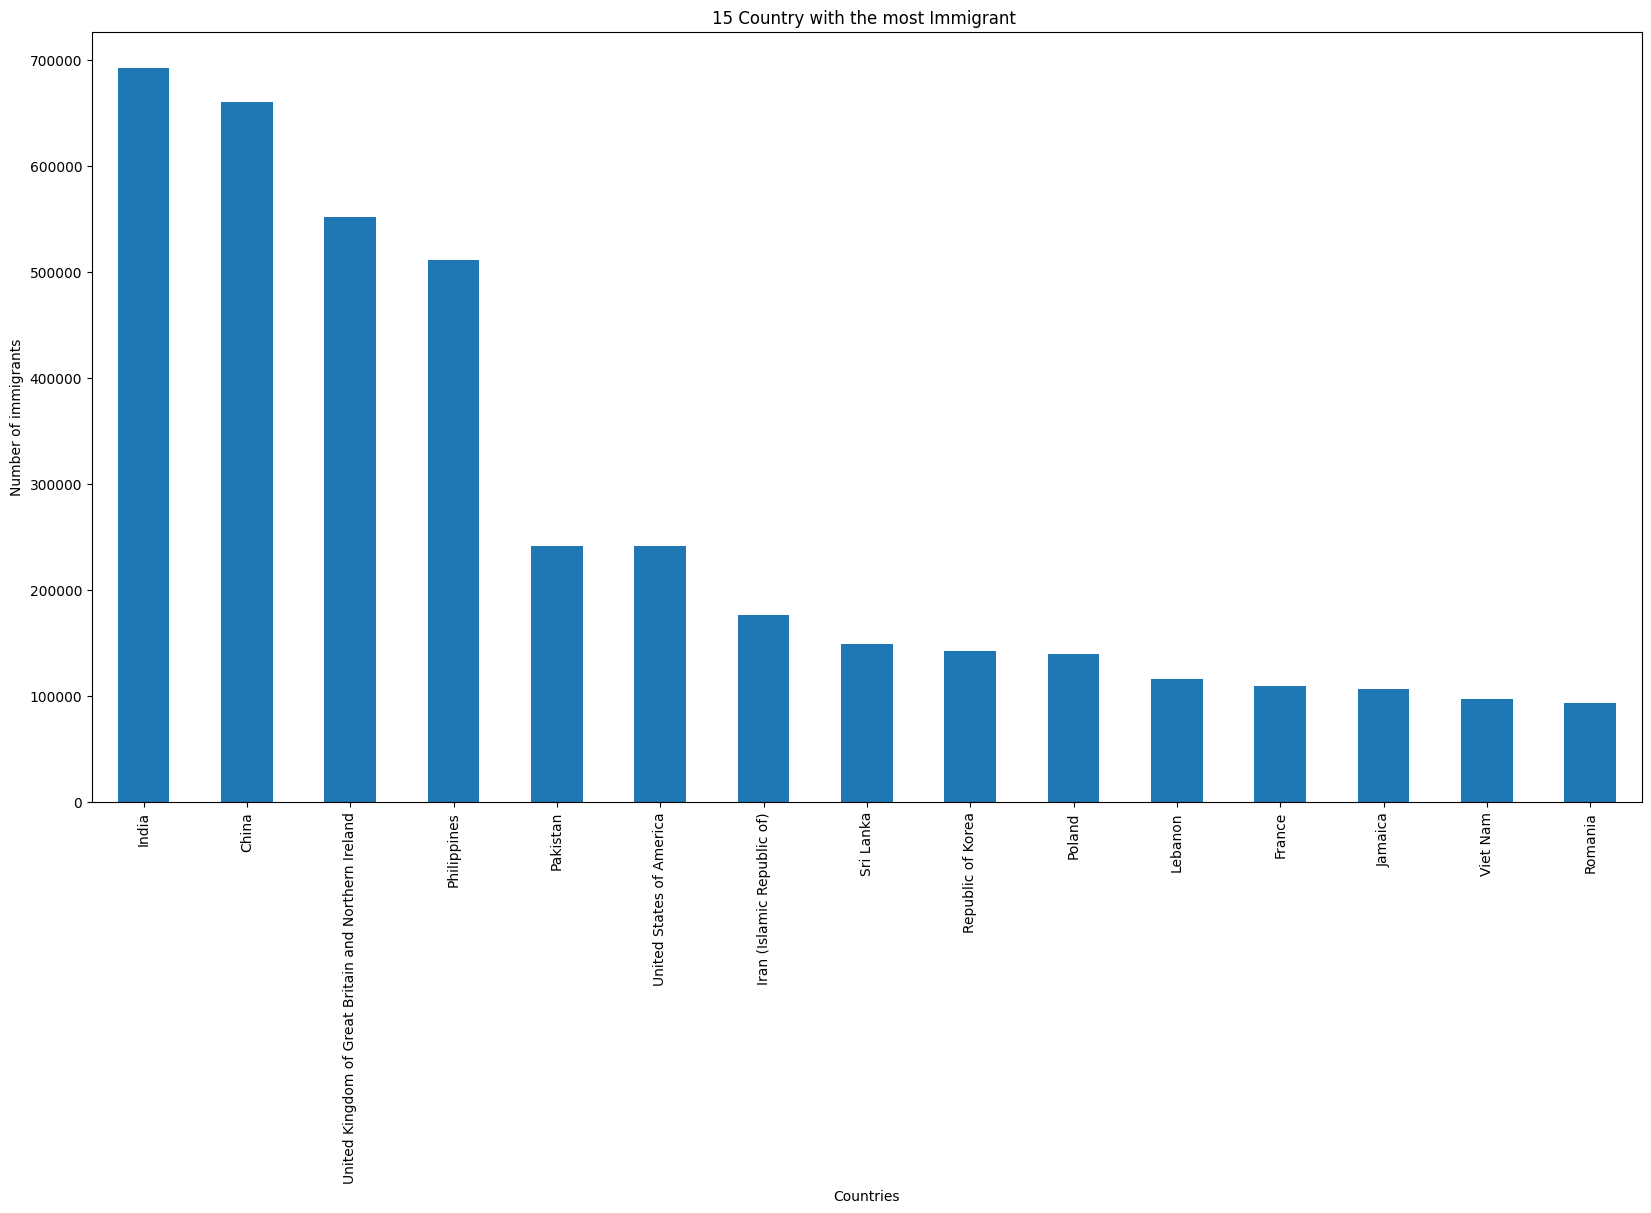

In [130]:
### type your answer here
top15.plot(kind='bar', figsize=(20, 10))

plt.xlabel('Countries')
plt.ylabel('Number of immigrants by') 
plt.title('15 Country with the most Immigrant ')

plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).